# Curve Fitting Demonstration In Python


## Background :

This analysis explores how input variables influence output performance across multiple datasets. Since relationships between variables may vary in form, different curve-fitting techniques are applied to capture both linear and nonlinear trends.

To fit and compare four regression curves — linear, quadratic, cubic, and exponential, compute their Mean Squared Errors (MSE), and visually identify the model that bestrepresents the underlying relationship in each case.


### Import Libraries

In [19]:
# Imports and helper functions
import numpy as np
import matplotlib.pyplot as plt


### Create functions

In [20]:

def mse(y_true, y_pred):
    """Mean squared error"""
    y_true = np.array(y_true, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    return float(np.mean((y_true - y_pred)**2))

# Small helper to plot cleanly
def quick_plot(x_data, y_data, curves, title, xlabel, ylabel):
    plt.figure(figsize=(7,4))
    plt.scatter(x_data, y_data, zorder=3)
    xgrid = np.linspace(np.min(x_data), np.max(x_data), 300)
    for label, func in curves:
        plt.plot(xgrid, func(xgrid), label=label)
    plt.title(title)
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.legend(); plt.grid(True); plt.show()


### Dataset 1 — Advertising Spend vs Sales (compare Linear vs Quadratic)


Ad Spend MSE — Linear: 32015.997
Ad Spend MSE — Quadratic: 1634.970


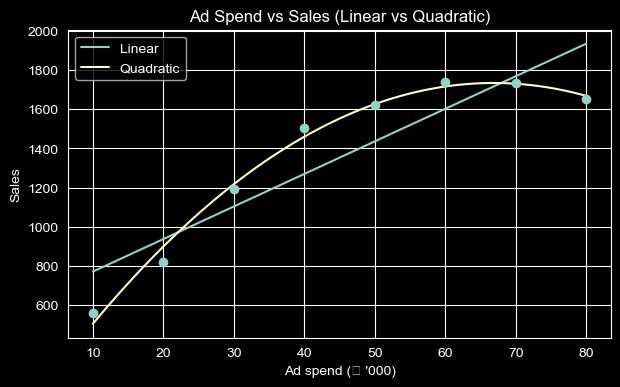

In [21]:
# DATASET 1
ad_spend = np.array([10,20,30,40,50,60,70,80], float)   # in ₹ '000
sales = np.array([560,820,1190,1505,1620,1740,1735,1650], float)

# Fit models
lin_coef_ad = np.polyfit(ad_spend, sales, 1)   # degree 1
quad_coef_ad = np.polyfit(ad_spend, sales, 2)  # degree 2

# Prediction functions (reuse for MSE and plotting)
def predict_ad_linear(x): return np.polyval(lin_coef_ad, x)
def predict_ad_quadratic(x): return np.polyval(quad_coef_ad, x)

# MSEs (at original data points)
mse_ad_linear = mse(sales, predict_ad_linear(ad_spend))
mse_ad_quad   = mse(sales, predict_ad_quadratic(ad_spend))

print(f"Ad Spend MSE — Linear: {mse_ad_linear:.3f}")
print(f"Ad Spend MSE — Quadratic: {mse_ad_quad:.3f}")

# Plot
quick_plot(ad_spend, sales,
           [("Linear", predict_ad_linear), ("Quadratic", predict_ad_quadratic)],
           "Ad Spend vs Sales (Linear vs Quadratic)", "Ad spend (₹ '000)", "Sales")

### Dataset 2 — Age vs Muscle Strength (compare Linear vs Quadratic vs Cubic)


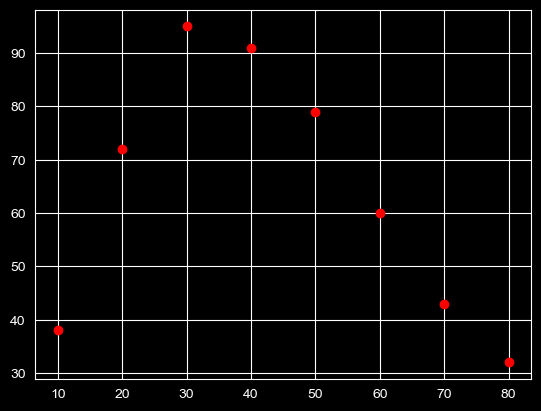

In [22]:
# DATASET 2
age = np.array([10,20,30,40,50,60,70,80], float)
strength = np.array([38,72,95,91,79,60,43,32], float)

plt.scatter(age, strength, color="red")

Strength MSE — Linear: 448.176
Strength MSE — Quadratic: 73.101
Strength MSE — Cubic: 3.283
Strength MSE — Quartic: 2.552


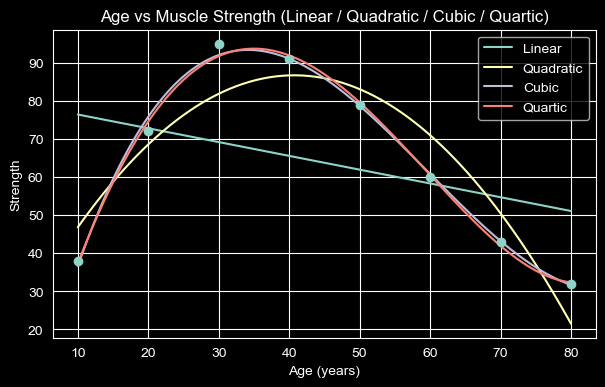

In [23]:
# Fit models
lin_coef_strength = np.polyfit(age, strength, 1)
quad_coef_strength = np.polyfit(age, strength, 2)
cubic_coef_strength = np.polyfit(age, strength, 3)
quartic_coef_strength = np.polyfit(age, strength, 4)

# Prediction functions
def predict_strength_linear(x): return np.polyval(lin_coef_strength, x)
def predict_strength_quadratic(x): return np.polyval(quad_coef_strength, x)
def predict_strength_cubic(x): return np.polyval(cubic_coef_strength, x)
def predict_strength_quartic(x): return np.polyval(quartic_coef_strength, x)

# MSEs (original data points)
mse_strength_lin = mse(strength, predict_strength_linear(age))
mse_strength_quad = mse(strength, predict_strength_quadratic(age))
mse_strength_cubic = mse(strength, predict_strength_cubic(age))
mse_strength_quartic = mse(strength, predict_strength_quartic(age))

print(f"Strength MSE — Linear: {mse_strength_lin:.3f}")
print(f"Strength MSE — Quadratic: {mse_strength_quad:.3f}")
print(f"Strength MSE — Cubic: {mse_strength_cubic:.3f}")
print(f"Strength MSE — Quartic: {mse_strength_quartic:.3f}")

# Plot
quick_plot(age, strength,
           [("Linear", predict_strength_linear),
            ("Quadratic", predict_strength_quadratic),
            ("Cubic", predict_strength_cubic),
            ("Quartic", predict_strength_quartic)],
           "Age vs Muscle Strength (Linear / Quadratic / Cubic / Quartic)", "Age (years)", "Strength")

### Dataset 3 — Subscribers over Months (Exponential fit)
Fit y = a * exp(b * x) via log-transform for stability.

Exponential model: y = 81.333 * exp(0.436597 * x)


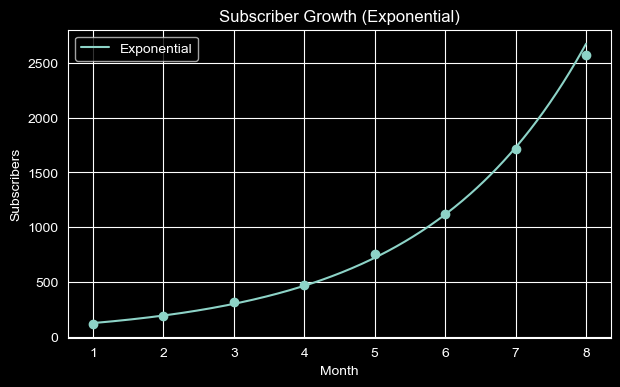

In [24]:
# DATASET 3
month = np.array([1,2,3,4,5,6,7,8], float)
subs = np.array([120,190,320,470,760,1120,1710,2570], float)

# Fit exponential using log-transform: ln(y) = ln(a) + b * x
ln_subs = np.log(subs)
b_subs, ln_a_subs = np.polyfit(month, ln_subs, 1)
a_subs = np.exp(ln_a_subs)

def predict_subs_exp(x): return a_subs * np.exp(b_subs * x)

preds = predict_subs_exp(month)
mse_subs_exp = np.mean((subs - preds)**2)

print(f"Exponential model: y = {a_subs:.3f} * exp({b_subs:.6f} * x)")

# Plot
quick_plot(month, subs, [("Exponential", predict_subs_exp)],
           "Subscriber Growth (Exponential)", "Month", "Subscribers")

### Summary — Coefficients & MSEs (print for quick copy)

In [25]:
# Print compact summary (coefficients + MSE)
print("--- Coefficients ---")
print("Ad linear coef (slope, intercept):", np.round(lin_coef_ad, 6))
print("Ad quad coef (a,b,c):", np.round(quad_coef_ad, 6))
print()
print("Strength linear coef:", np.round(lin_coef_strength, 6))
print("Strength quad coef:", np.round(quad_coef_strength, 6))
print("Strength cubic coef:", np.round(cubic_coef_strength, 6))
print()
print("Subs exponential a,b:", np.round([a_subs, b_subs], 6))
print()
print("--- MSEs ---")
print("Ad — Linear:", round(mse_ad_linear,3), "  Quadratic:", round(mse_ad_quad,3))
print("Strength — Linear:", round(mse_strength_lin,3), "  Quadratic:", round(mse_strength_quad,3), "  Cubic:", round(mse_strength_cubic,3))
print("Subscribers — Exponential:", round(mse_subs_exp,3))

--- Coefficients ---
Ad linear coef (slope, intercept): [ 16.630952 604.107143]
Ad quad coef (a,b,c): [-0.380357 50.863095 33.571429]

Strength linear coef: [-0.361905 80.035714]
Strength quad coef: [-0.042262  3.441667 16.642857]
Strength cubic coef: [ 9.7000000e-04 -1.7317100e-01  8.4356060e+00 -3.1357143e+01]

Subs exponential a,b: [81.332591  0.436597]

--- MSEs ---
Ad — Linear: 32015.997   Quadratic: 1634.97
Strength — Linear: 448.176   Quadratic: 73.101   Cubic: 3.283
Subscribers — Exponential: 1629.662


### Notes
- All prediction functions are reusable for both computing MSE and plotting.
- The plots use a dense `xgrid` for smooth curves (implemented inside `quick_plot`).
- Feel free to modify datasets or add noise for demonstrations.